In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 25, 8
from statsmodels.tsa.stattools import adfuller
from pandas.core import datetools

In [3]:
data = pd.read_csv('/home/vivek/Documents/Data_Science/Data_Sets/Electricity/HomeA/2016/HomeA-meter4_2016.csv')
print data.head()

           Date & Time  use [kW]  gen [kW]  KitchenDenLights [kW]  \
0  2016-01-01 00:00:00       0.0       0.0               0.007658   
1  2016-01-01 00:15:00       0.0       0.0               0.007607   
2  2016-01-01 00:30:00       0.0       0.0               0.007591   
3  2016-01-01 00:45:00       0.0       0.0               0.007613   
4  2016-01-01 01:00:00       0.0       0.0               0.007593   

   MasterBedBathLights [kW]  MasterOutlets [kW]  DenOutdoorLights [kW]  \
0                  0.021299            0.021406               0.000456   
1                  0.004709            0.021479               0.000487   
2                  0.004656            0.020737               0.000480   
3                  0.004643            0.020870               0.000496   
4                  0.004641            0.020090               0.000494   

   DenOutlets [kW]  RearBasementLights [kW]  KitchenOutletsEast [kW]  \
0         0.002296                 0.001924                 0.003860

In [21]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')
data = pd.read_csv('/home/vivek/Documents/Data_Science/Data_Sets/Electricity/HomeA/2016/HomeA-meter2_2016.csv', parse_dates=['Date & Time'], index_col='Date & Time',date_parser=dateparse, nrows=1488)
#print data.head()
#len(data)
data=data.resample('D').mean()
data.head()

,use [kW],gen [kW],FurnaceHRV [kW],CellarOutlets [kW],WashingMachine [kW],FridgeRange [kW],DisposalDishwasher [kW],KitchenLights [kW],BedroomOutlets [kW],BedroomLights [kW],MasterOutlets [kW],MasterLights [kW],DuctHeaterHRV [kW]
Date & Time,,,,,,,,,,,,,
2016-01-01,0.0,0.0,0.147031,0.066256,0.000408,0.001261,0.000176,0.000036,0.012678,0.007003,0.014203,0.014424,0.000063
2016-01-02,0.0,0.0,0.204880,0.067569,0.000485,0.001147,0.000192,0.000040,0.012667,0.007504,0.014060,0.015260,0.000071
2016-01-03,0.0,0.0,0.189604,0.072765,0.000419,0.001033,0.000137,0.000031,0.010497,0.005547,0.012111,0.014498,0.000059
2016-01-04,0.0,0.0,0.274438,0.072578,0.000660,0.001075,0.000176,0.000066,0.009360,0.008687,0.024271,0.014818,0.000078
2016-01-05,0.0,0.0,0.237146,0.072162,0.000543,0.001089,0.000138,0.000028,0.009080,0.006014,0.010256,0.014173,0.000064


In [22]:
ts=data['FurnaceHRV [kW]']
ts.tail()
#ts.resample('3T', on=ts['FurnaceHRV [kW]']).sum()

Date & Time
2016-01-27    0.151511
2016-01-28    0.192627
2016-01-29    0.166741
2016-01-30    0.237619
2016-01-31    0.153621
Freq: D, Name: FurnaceHRV [kW], dtype: float64

In [23]:
ts['2016'].head()

Date & Time
2016-01-01    0.147031
2016-01-02    0.204880
2016-01-03    0.189604
2016-01-04    0.274438
2016-01-05    0.237146
Freq: D, Name: FurnaceHRV [kW], dtype: float64

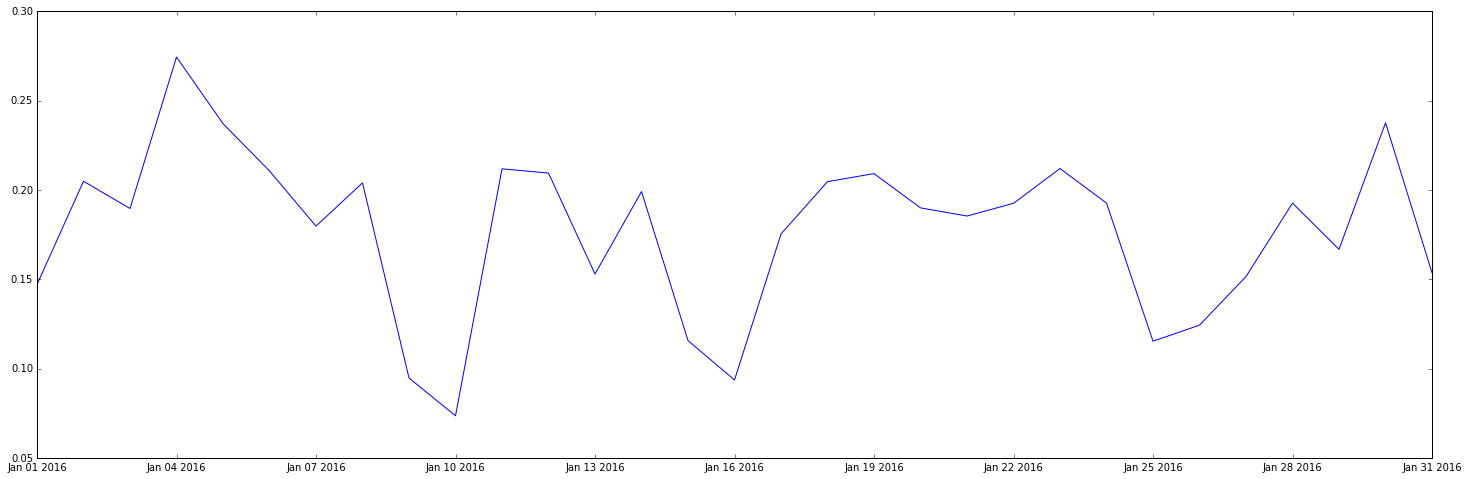

In [24]:
plt.plot(ts)

In [25]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
   # rolmean = pd.rolling_mean(timeseries, window=12)
   # rolstd = pd.rolling_std(timeseries, window=12)
    
    rolstd= ts.rolling(window=12,center=False).std()
    rolmean=ts.rolling(window=12,center=False).mean()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

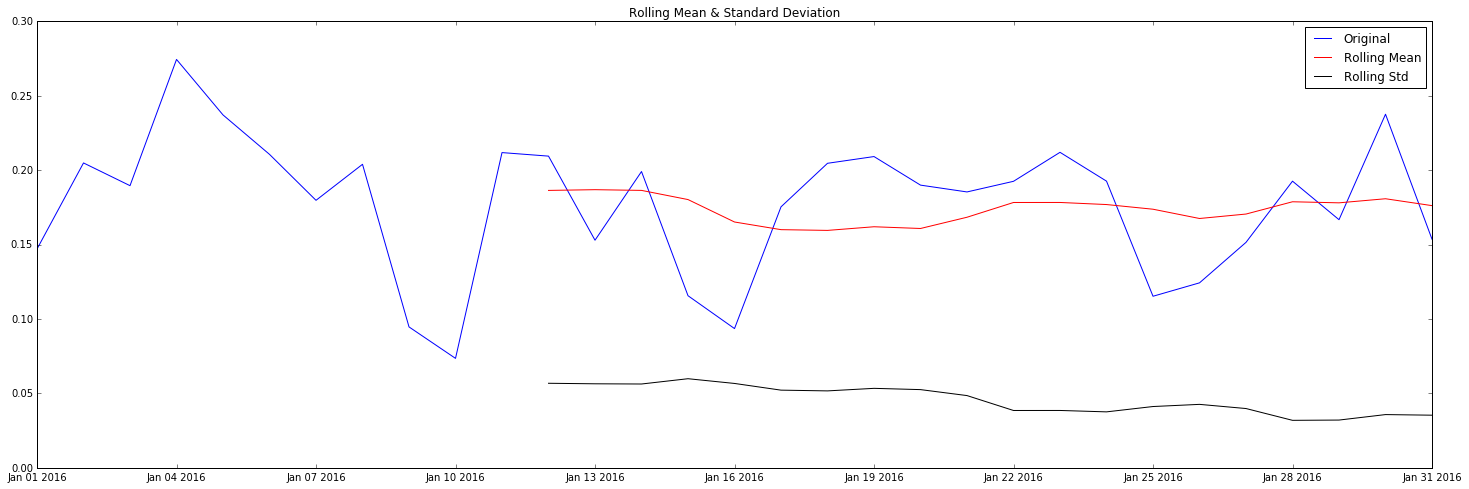

Results of Dickey-Fuller Test:
Test Statistic                 -3.609976
p-value                         0.005573
#Lags Used                      1.000000
Number of Observations Used    29.000000
Critical Value (5%)            -2.967882
Critical Value (1%)            -3.679060
Critical Value (10%)           -2.623158
dtype: float64


In [26]:
test_stationarity(ts)

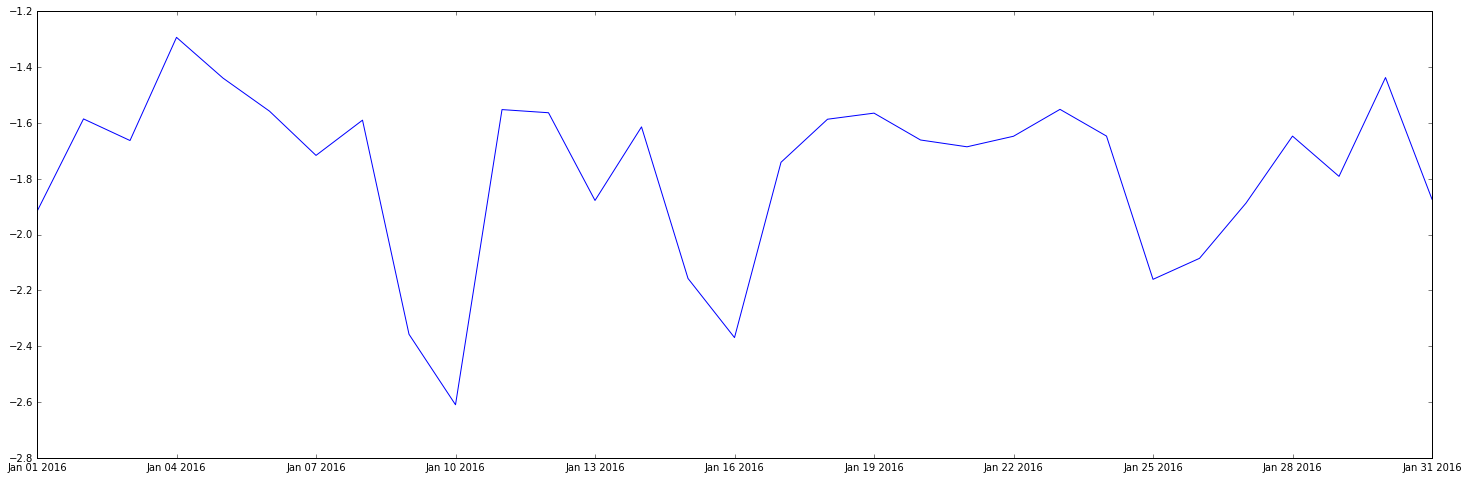

In [27]:
ts_log = np.log(ts)
plt.plot(ts_log)

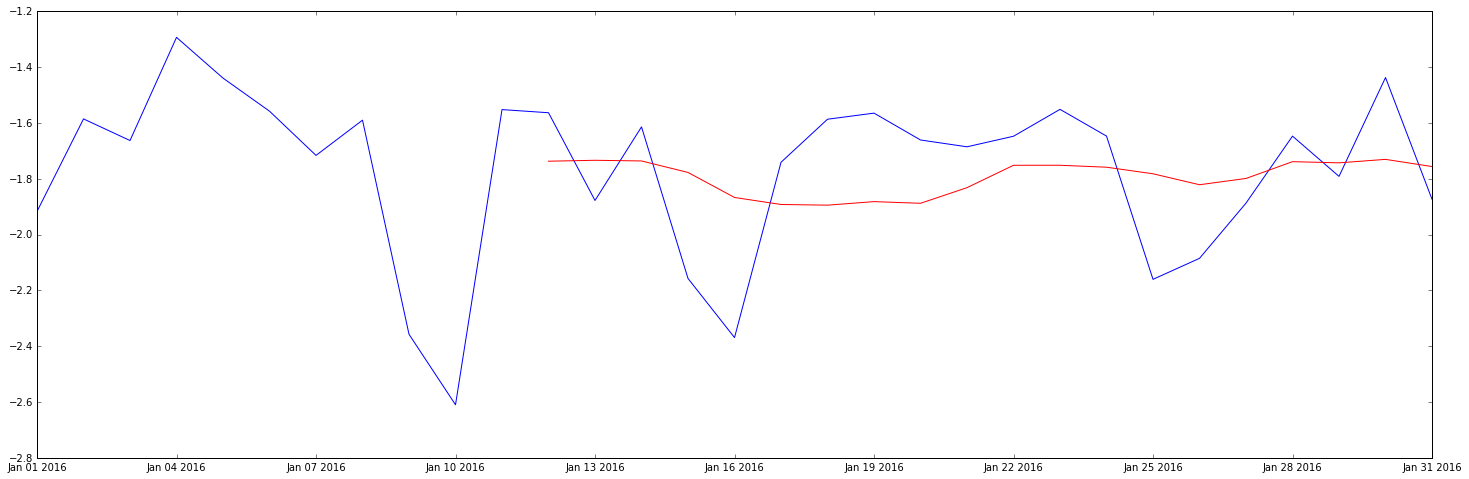

In [28]:
#moving_avg = pd.rolling_mean(ts_log,12)
moving_avg=ts_log.rolling(window=12,center=False).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [29]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Date & Time
2016-01-01         NaN
2016-01-02         NaN
2016-01-03         NaN
2016-01-04         NaN
2016-01-05         NaN
2016-01-06         NaN
2016-01-07         NaN
2016-01-08         NaN
2016-01-09         NaN
2016-01-10         NaN
2016-01-11         NaN
2016-01-12    0.173718
Freq: D, Name: FurnaceHRV [kW], dtype: float64

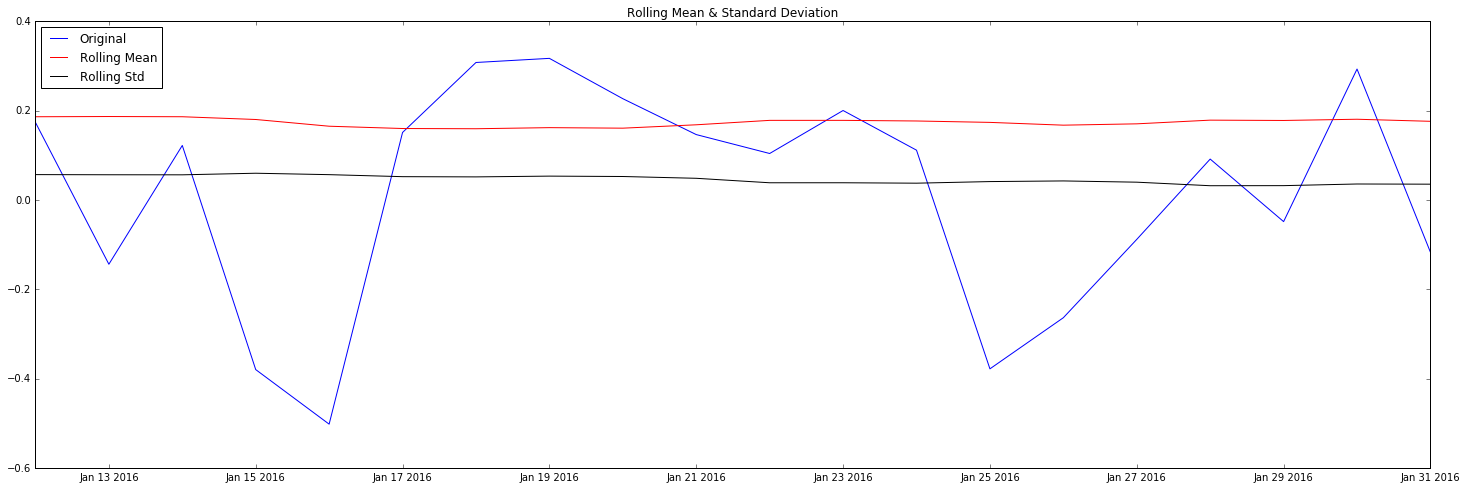

Results of Dickey-Fuller Test:
Test Statistic                -6.579825e+00
p-value                        7.563273e-09
#Lags Used                     8.000000e+00
Number of Observations Used    1.100000e+01
Critical Value (5%)           -3.189369e+00
Critical Value (1%)           -4.223238e+00
Critical Value (10%)          -2.729839e+00
dtype: float64


In [30]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

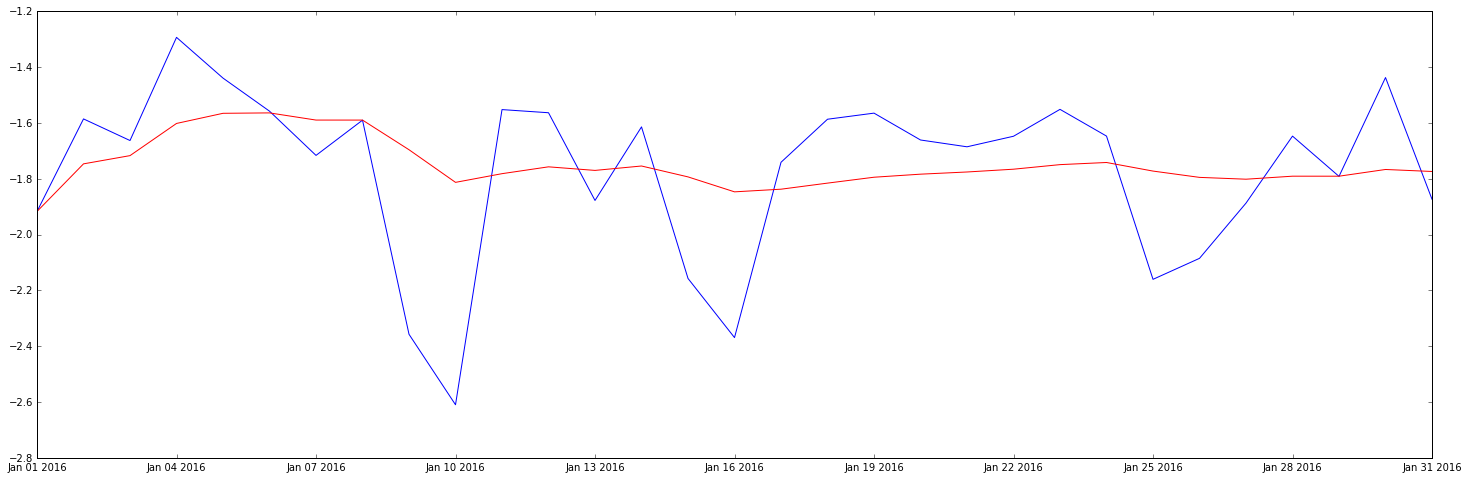

In [31]:
#expwighted_avg = pd.ewma(ts_log, halflife=12)
expwighted_avg =ts_log.ewm(halflife=12,ignore_na=False,min_periods=0,adjust=True).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

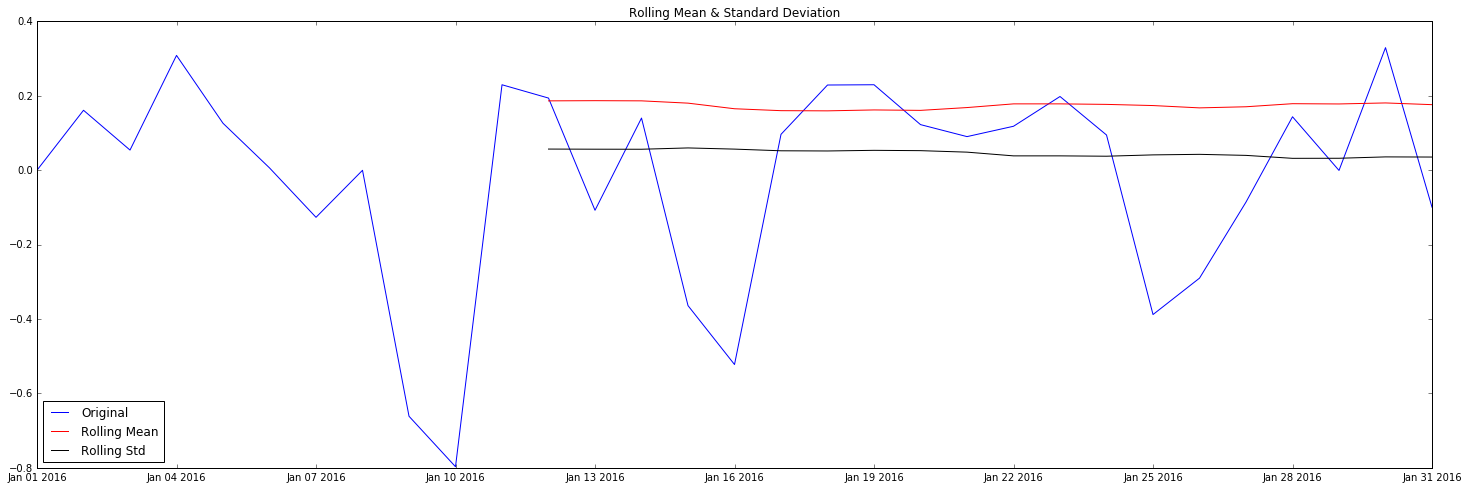

Results of Dickey-Fuller Test:
Test Statistic                 -3.730075
p-value                         0.003709
#Lags Used                      3.000000
Number of Observations Used    27.000000
Critical Value (5%)            -2.976430
Critical Value (1%)            -3.699608
Critical Value (10%)           -2.627601
dtype: float64


In [32]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

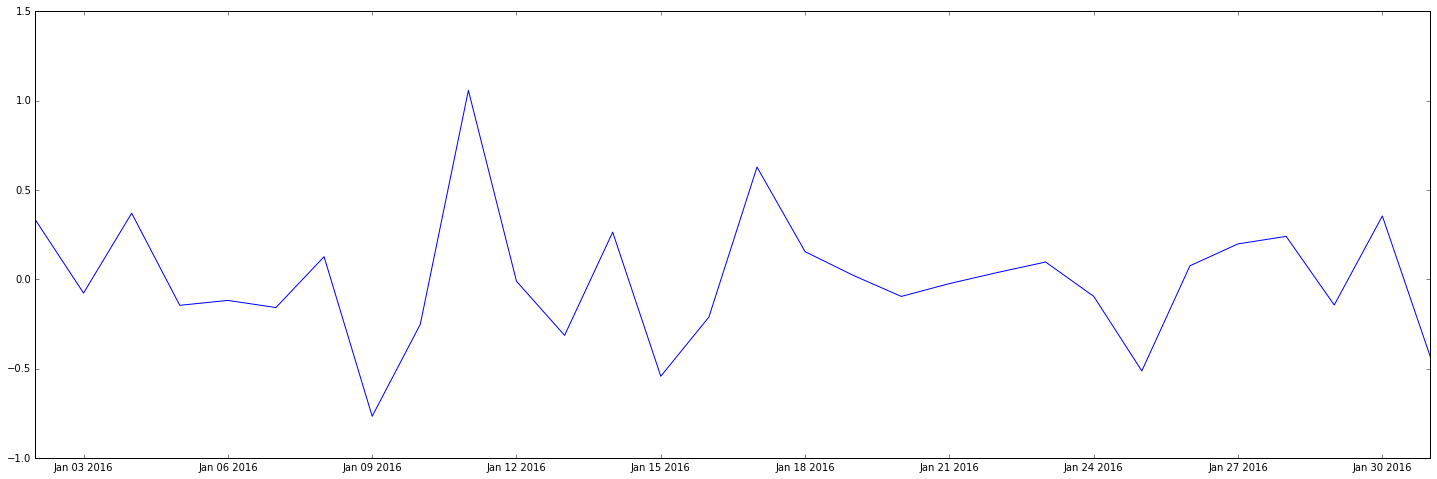

In [33]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

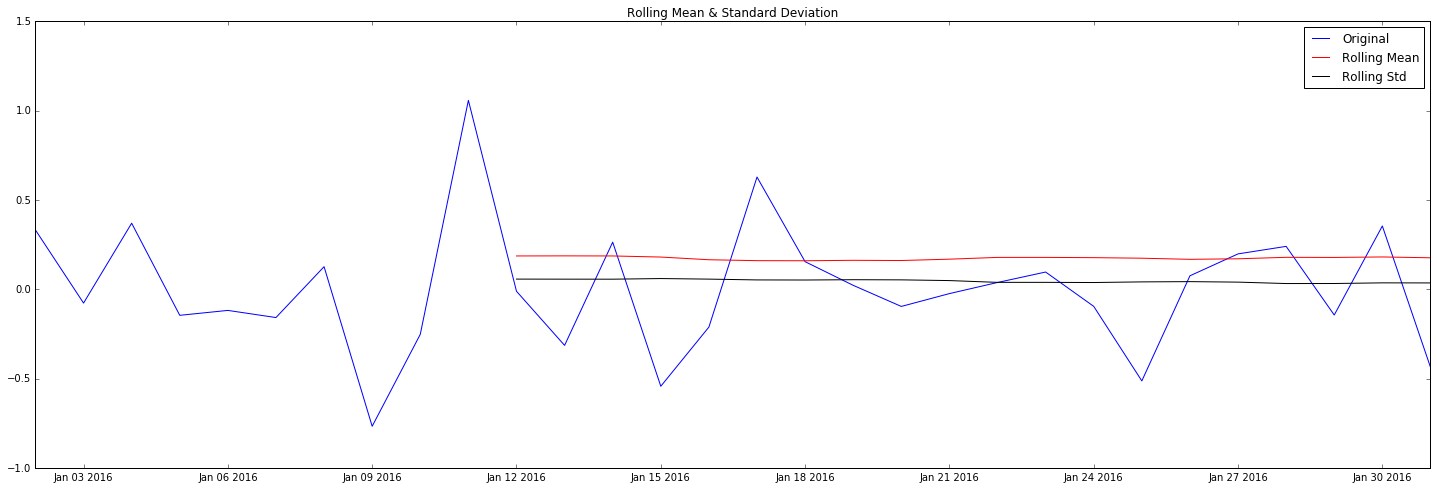

Results of Dickey-Fuller Test:
Test Statistic                 -4.467538
p-value                         0.000225
#Lags Used                      4.000000
Number of Observations Used    25.000000
Critical Value (5%)            -2.986489
Critical Value (1%)            -3.723863
Critical Value (10%)           -2.632800
dtype: float64


In [34]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

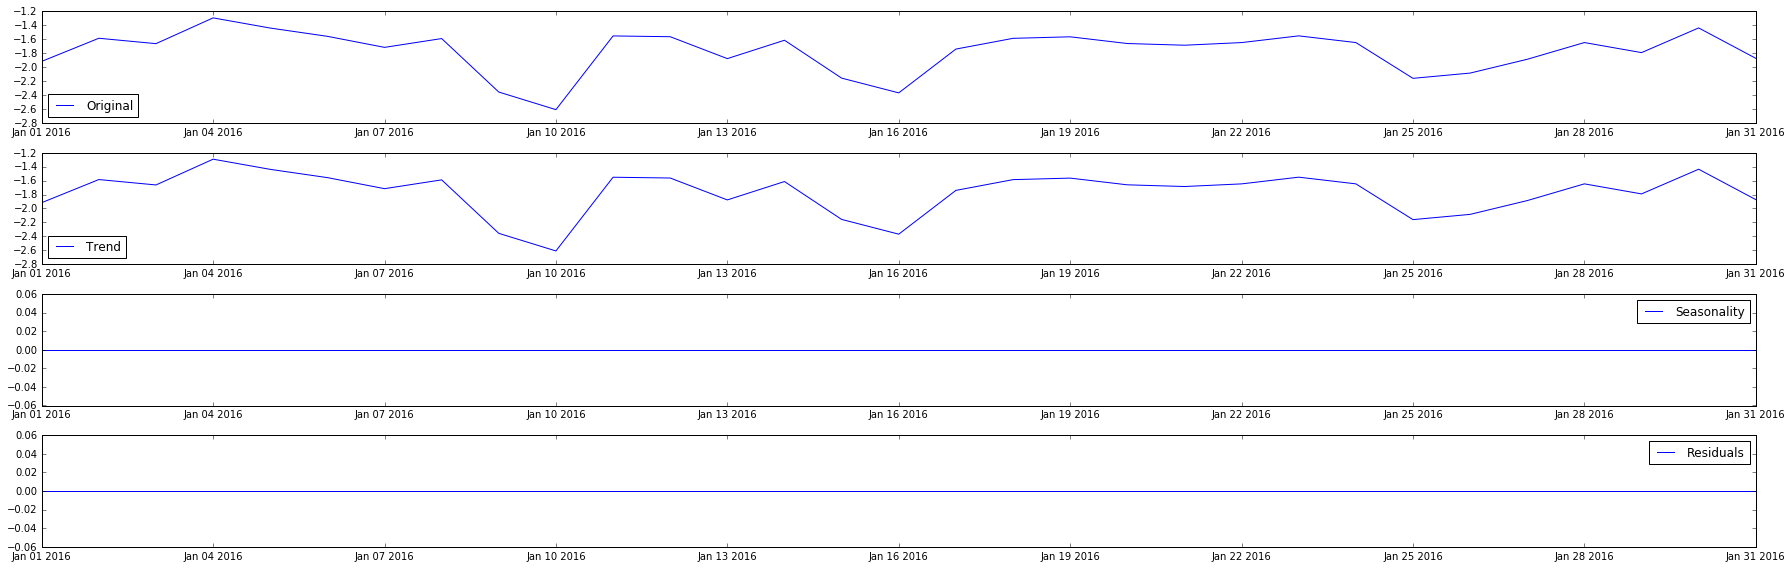

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts_log,freq=1)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

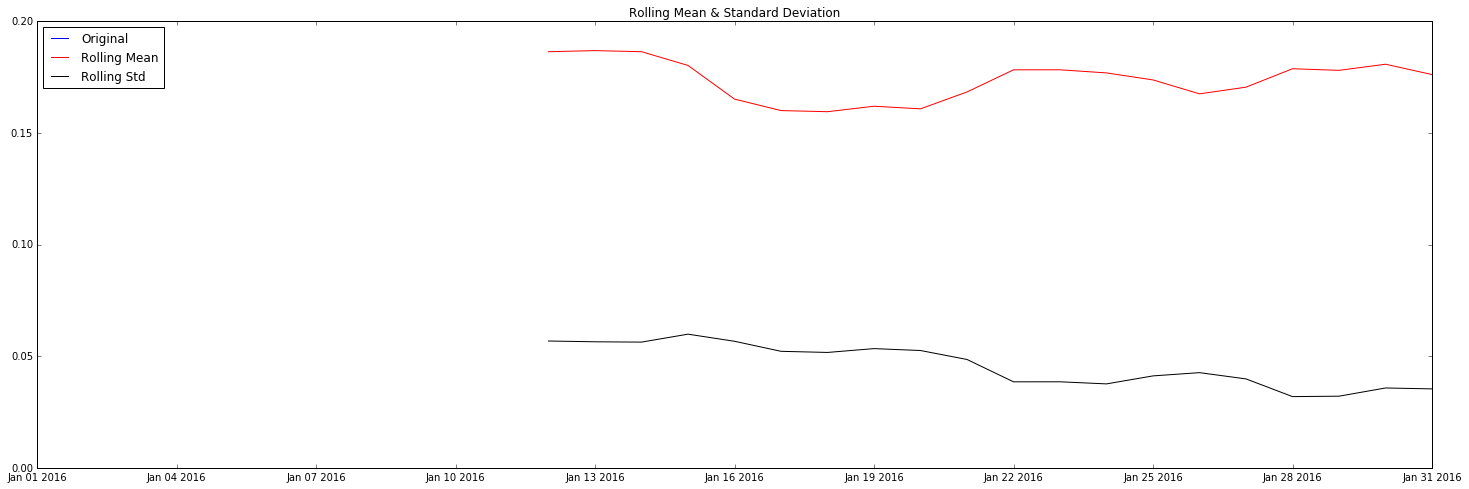

Results of Dickey-Fuller Test:
Test Statistic                       NaN
p-value                              NaN
#Lags Used                      0.000000
Number of Observations Used    30.000000
Critical Value (5%)            -2.964071
Critical Value (1%)            -3.669920
Critical Value (10%)           -2.621171
dtype: float64


/usr/local/lib/python2.7/dist-packages/statsmodels/regression/linear_model.py:660: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in divide
  return self.params / self.bse


In [40]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [41]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [42]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

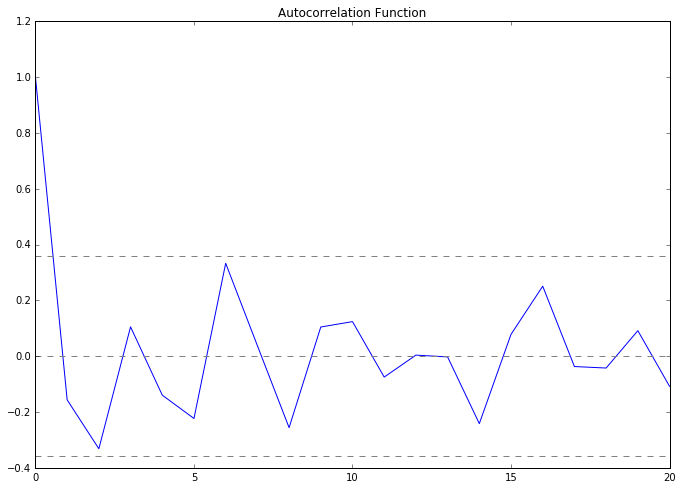

In [43]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

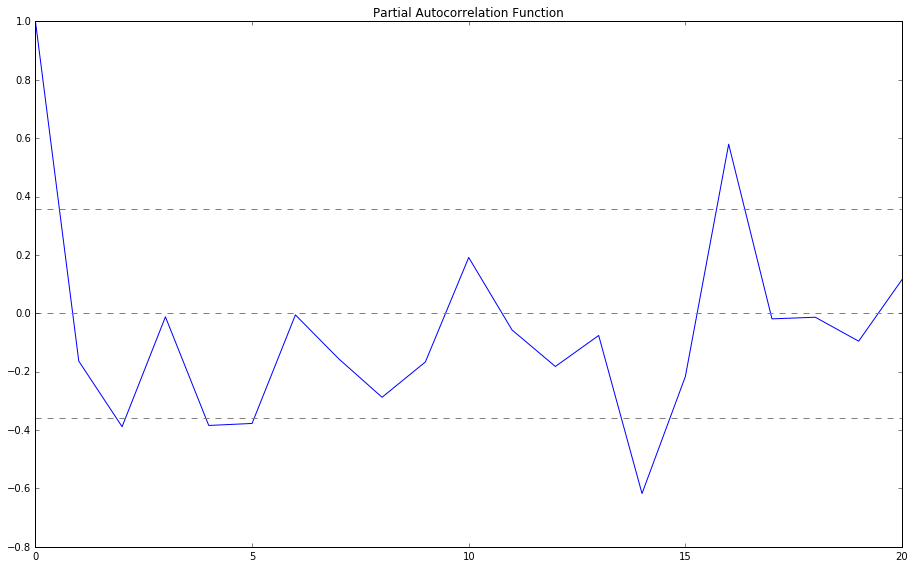

In [44]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [46]:
from statsmodels.tsa.arima_model import ARIMA

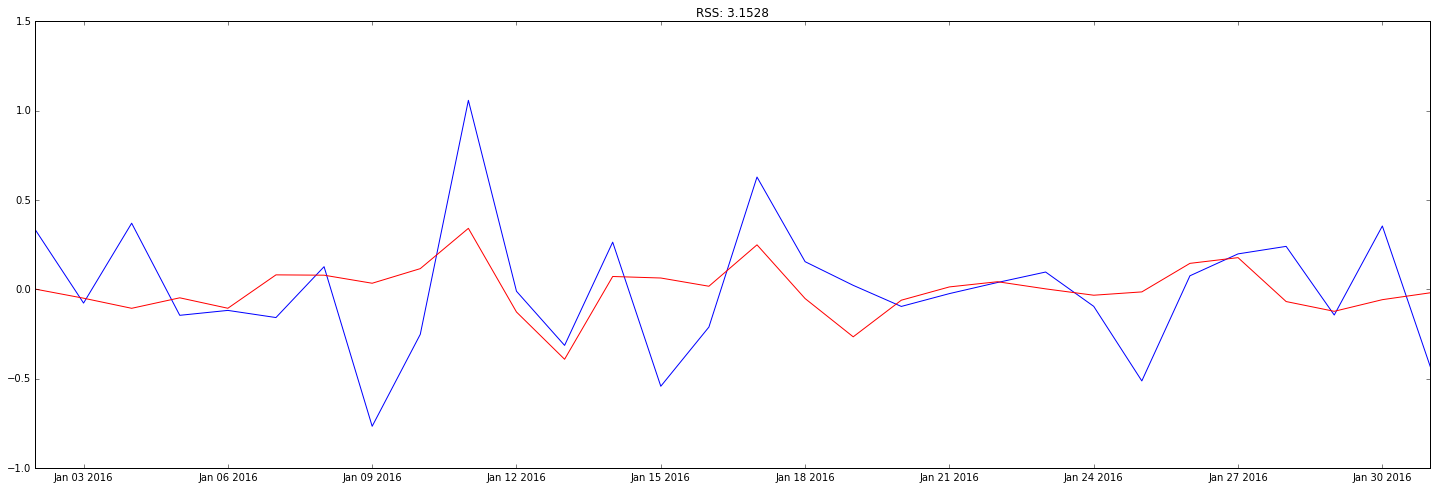

In [47]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

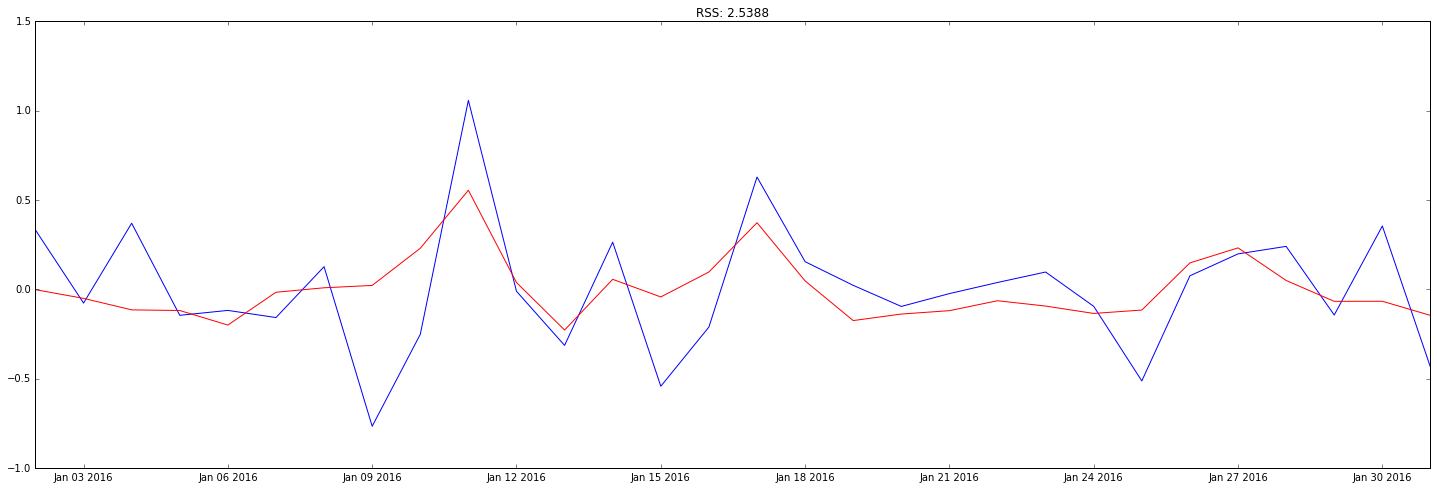

In [48]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

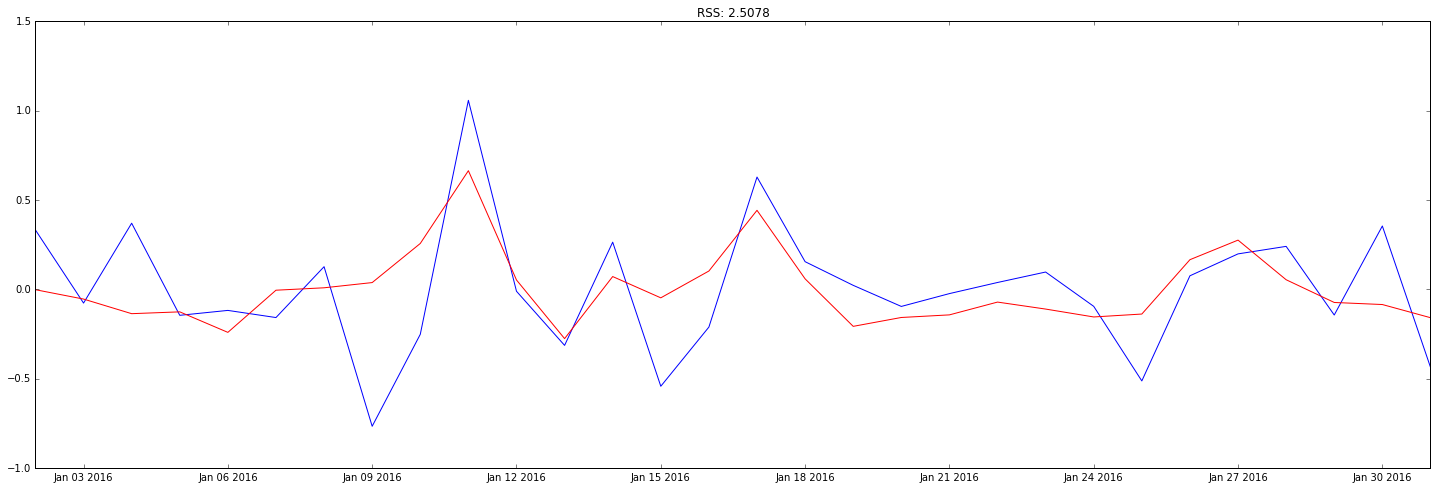

In [49]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [50]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print predictions_ARIMA_diff.head()

Date & Time
2016-01-02   -0.002587
2016-01-03   -0.055068
2016-01-04   -0.136838
2016-01-05   -0.126660
2016-01-06   -0.241531
Freq: D, dtype: float64


In [51]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print predictions_ARIMA_diff_cumsum.head()

Date & Time
2016-01-02   -0.002587
2016-01-03   -0.057655
2016-01-04   -0.194494
2016-01-05   -0.321154
2016-01-06   -0.562685
Freq: D, dtype: float64


In [52]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date & Time
2016-01-01   -1.917111
2016-01-02   -1.919698
2016-01-03   -1.974766
2016-01-04   -2.111604
2016-01-05   -2.238264
Freq: D, dtype: float64

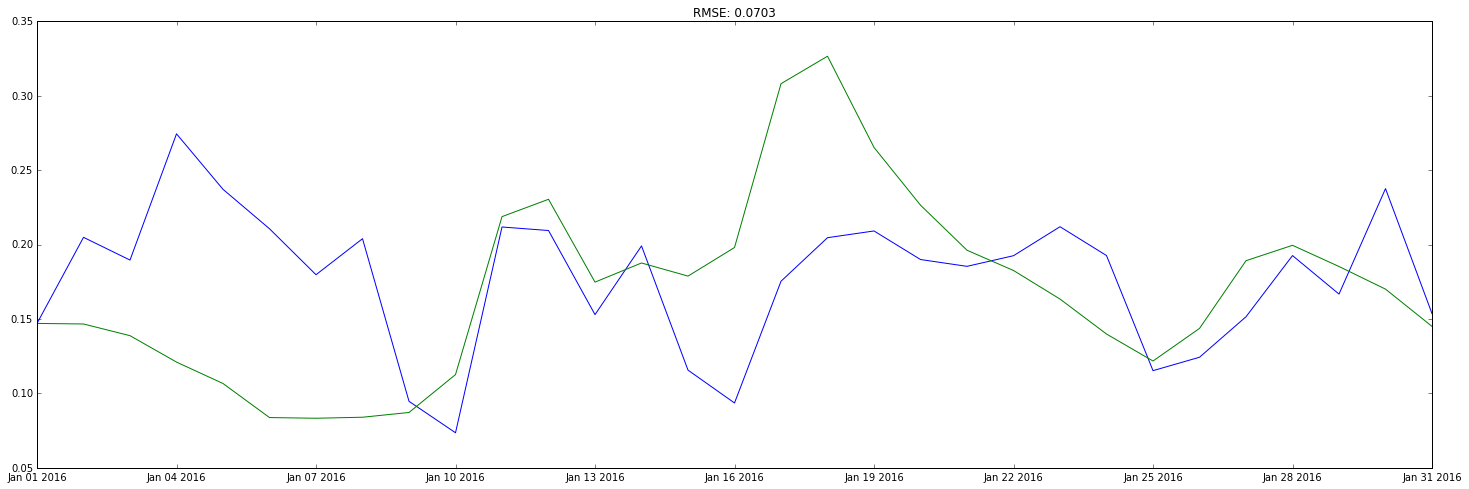

In [54]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))